Lets see what we can do with a wordmap (plot, noise reduction and possibly partitioning into morphemes?)

In [1]:
import text_utilities as tu # importing data
import numpy as np # arrays
import scipy.stats as stats # arithmetics
import matplotlib.pyplot as pp # plotting
%load_ext autoreload
%autoreload 2

In [2]:
# IMPORT DATA

wordset = tu.from_path('../data/experiment/verbs')

verb_dict = tu.count_syllables(wordset)
verb_dict.keys()
for i in range(1,9): # von mächtigster menge absteigend morpheme analysieren
    print(i, len(verb_dict[i]))

1 5010
2 27261
3 30123
4 14810
5 4455
6 1005
7 193
8 32


In [21]:
# CALCULATE RELATIVE FREQUENCY OF EACH LETTER AS FILTER FOR PLOTTING

allchars = ""
for sylnumber in verb_dict:
    for v in verb_dict[sylnumber]:
        allchars+=v


import collections as cl
n_maps = cl.Counter(list(allchars)).most_common()
char_array = np.array(n_maps)


n_count = [i[1] for i in n_maps]
total_count = sum(n_count)
rel_freqs = [i/total_count for i in n_count]

# ARRAY WITH CHARS, COUNTS and REL. FREQ
full_array = np.column_stack((char_array, rel_freqs))
full_dict = {j: (int(k),float(l)) for (j, k, l) in full_array}

In [5]:
class MapToken:
    def __init__(self, str, map):
        self.map = map
        self.freqmap = map
        self.str = str
        self.str_list = list(map)

mt = MapToken("verstehen", [2771, 2526, 2512, 623, 177, 120, 157, 1088, 3879])


Text(0.5, 0, 'verstehen')

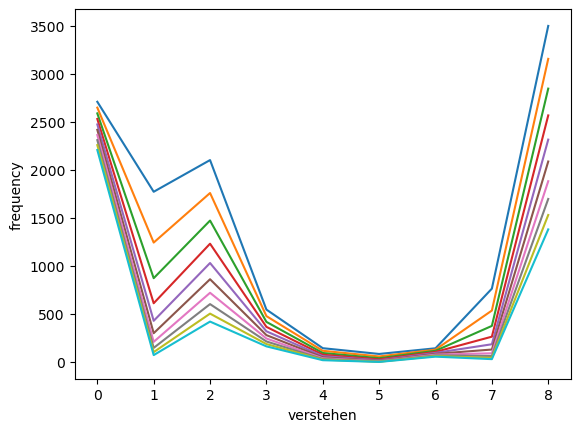

In [8]:

for p in range(20):
    for i in range(len(mt.str)):
        mt.map[i] = int(mt.map[i]*(1-full_dict[mt.str[i]][1]))

    if p%2:
        pp.plot(np.array(mt.map))
pp.ylabel('frequency')
pp.xlabel(mt.str)

In [11]:
lili = [8173, 4911, 272, 173, 36, 110, 51, 767, 4591, 10855]
for i in range(len(lili)):
    lili[i] = int(lili[i]*(1-full_dict["verstehen"[i]][1]))


In [12]:
lili

[2740, 2116, 2298, 583, 159, 100, 149, 911, 2469]

([<matplotlib.axis.XTick at 0x7fcda2e55490>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

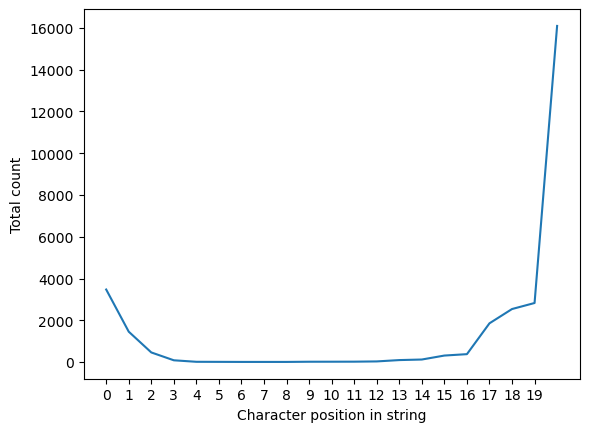

In [20]:
# PLOT FREQUENCY MAP FOR WORD
arr = np.array([3473, 1454, 460, 84, 12, 9, 6, 6, 6, 15, 16, 18, 30, 94, 121, 311, 378, 1855, 2539, 2828, 16098])

pp.plot(range(len(arr)), arr)
pp.ylabel('Total count')
pp.xlabel('Character position in string')
pp.xticks(np.arange(stop=20,step=1))

In [22]:
full_dict

{'e': (129905, 0.16219310599704342),
 't': (77211, 0.09640192376842863),
 'r': (68048, 0.08496144472412002),
 's': (50953, 0.06361745375364578),
 'i': (48245, 0.06023637580406728),
 'a': (40970, 0.051153162331695236),
 'n': (40193, 0.0501830376762955),
 'h': (36679, 0.04579562707259579),
 'l': (32644, 0.040757721043589434),
 'u': (29988, 0.03744156778137361),
 ' ': (28118, 0.03510677613967798),
 'c': (26522, 0.03311408765831635),
 'g': (24643, 0.03076805905150026),
 'b': (22413, 0.027983788804986216),
 'm': (19943, 0.0248998661552599),
 'k': (16846, 0.021033101602141516),
 'f': (16357, 0.020422559830596508),
 'o': (14840, 0.018528506931958927),
 'd': (14059, 0.01755338806983899),
 'p': (12461, 0.015558202485117264),
 'z': (12020, 0.015007591194214711),
 'w': (8939, 0.011160803467977147),
 'v': (8892, 0.011102121539014742),
 'ü': (7642, 0.009541431938950818),
 'ä': (6046, 0.007548743457589197),
 'ö': (2628, 0.0032811938151743976),
 'ß': (1651, 0.002061358823764433),
 'x': (559, 0.000697